# Restnet is Residual Network and its introduced to solve the problem of vanishing gradeint. Resnet works on the concept of skip connection. 
here the intension is to make x=y but at the of CNN model we get y=f(x)+x so we need to make this
f(x) ie, function of x to '0' to achieve x=y
<!--  --> resnet is used for computer vision tasks like image classification, object/image detection and image/obejct recognition. 


In [44]:
import os
import PIL

In [45]:
import tensorflow as tf
from tensorflow import keras

import pathlib
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin= dataset_url, untar= True)
data_dir= pathlib.Path(data_dir)


In [46]:
print(data_dir)

C:\Users\Manjula\.keras\datasets\flower_photos


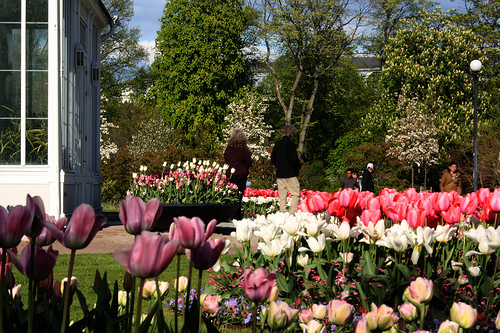

In [61]:
tulips= list(data_dir.glob('tulips/*'))
roses= list(data_dir.glob('roses/*'))
daisy= list(data_dir.glob('daisy/*'))
sunflowers= list(data_dir.glob('sunflowers/*'))
dandelion= list(data_dir.glob('dandelion/*'))

# print(roses[1])    #This will give the path where the image is stored 
PIL.Image.open(str(tulips[150]))

In [84]:
#  lets check the how many images of tulips are there
type(roses)
len(tulips)

799

In [83]:
# # Lets try to get random rose/tulips/ etc..  images
# import matplotlib.pyplot as plt
# import random
# idx= random.randint(0,len(tulips))
# plt.imshow(tulips[idx])
#                             # This gives an error saying it a tuple, could be coz roses in the data set may be stored in tuple

In [85]:
# We need to split the data to training and testing/validation 

img_h, img_w= 180, 180
batch_size= 32
train_ds= tf.keras.preprocessing.image_dataset_from_directory(
            data_dir, 
            validation_split= 0.2,
            subset= 'training',
            seed= 123,
            label_mode= 'categorical',      #coz here we have more than 2; 5clases in the dataset
            image_size= (img_h, img_w),
            batch_size= batch_size)              # remeber to pass the parameters as it is coz this is from keras where is already defined

# this is for training set

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [86]:
#  split for testing/validation set

val_ds= tf.keras.preprocessing.image_dataset_from_directory(
            data_dir, 
            validation_split= 0.2,
            subset= 'validation',
            seed= 123,
            label_mode= 'categorical',      
            image_size= (img_h, img_w),
            batch_size= batch_size)              


# splitting into training and validatio is automatically going to be done for us through keras. 
# we have in total 3670 images in dataset out of which 2936 is for training and rest 734 is for validation/testing


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [87]:
# printig the different clases in teh dataset

clases= train_ds.class_names
print(clases)                          # these are 5 different clases 

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


# Training model using the source code from  '--
'https://keras.io/api/applications/resnet/#resnet50-function'

In [10]:
# we already have the rest50 trained model which has trained the images and weights and have them. 
# Now via transfer learning, we would alter a little according to our dataset and transfer the 
# learning from resnet50 which it has already learnt

In [11]:
#  will import all the libraries need further 

import numpy as np
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [88]:
resnet_model= Sequential()

pretrained_model= tf.keras.applications.ResNet50(
    include_top=False,            # Im setting this to False coz here I'm going to use my own i/p and o/p layer. coz the original mode might have been trained on different image dimension with many clases/less classes than mine
    weights='imagenet',           # here i would use the same weights that was used for pretrained model while training coz Im going with transfer learning
    input_tensor=None,
    input_shape= (180,180,3),     # changing the input shape to 180 as i want to keep that shape for my images 
    pooling= 'avg',               # pooling i would keep 'avg', later may be will change it to max
    classes= 5)                   # classes we have in this dataset is 5


for layer in pretrained_model.layers: 
    layer.trainable= False             # im setting this to False coz I dont want to disturb that pretraied model. I dont want to train it again coz its already learnt teh weights and want to retain the same
    

# Now will train my model using the pretrained model
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())            # here whatever the model gave, Im flattening it to one dim
resnet_model.add(Dense(512, activation= 'relu'))         # adding fully connected layers at the end. these 512 neurons will be learning the new weights; rest of the weights in the hidden layers are going to stay the same
resnet_model.add(Dense(5, activation= 'softmax'))    # o/p layer will have 5 and actiavtion funcion softmax coz its more than 2 o/ps



In [89]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [90]:
# Now the model is ready and We need to compile it

resnet_model.compile(loss= 'categorical_crossentropy' , optimizer= Adam(learning_rate=0.001) , metrics= ['accuracy'])

C:\Users\Manjula\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [91]:
#  now all we need to do is to fit the model

history= resnet_model.fit(train_ds, validation_data= val_ds, epochs= 2)

Epoch 1/2
92/92 [==============================] - 180s 2s/step - loss: 0.7339 - accuracy: 0.7776 - val_loss: 0.4399 - val_accuracy: 0.8501
Epoch 2/2
92/92 [==============================] - 185s 2s/step - loss: 0.2911 - accuracy: 0.8924 - val_loss: 0.3584 - val_accuracy: 0.8760


# Evaluate the model

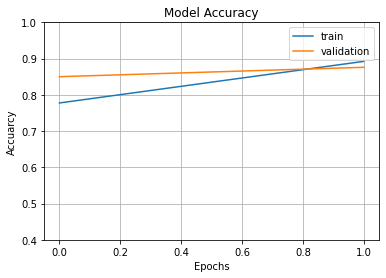

In [92]:
#  lets visualize the o/p and the power of the model
# model logs we have stored in history
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4, ymax=1)
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.title('Model Accuracy')
plt.legend(['train','validation'])
plt.show()                              # in comparison to YT; getting the wrong plot for both model accuracy and model loss


In [4]:
# # lets try to plot again in simpler way 
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label= 'train')
# pyplot.plot(history.history['val_loss'], label= 'va;idation loss')
# pyplot.legend
# pyplot.show()


# will run this code later when i rerun this program

NameError: name 'history' is not defined

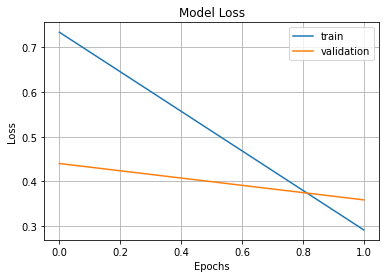

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

# Making predictions

In [128]:
import cv2
import numpy as np

image= cv2.imread(str(daisy[255]))
image_reasize= cv2.resize(image, (img_h, img_w))  # resizing it to 180 * 180 coz thats what the model has learnt
image= np.expand_dims(image_reasize, axis=0)      # this func is to make it 4 dim;its important to make it 4dims coz it ran on many images
print(image.shape)

(1, 180, 180, 3)


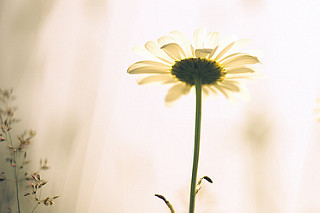

In [131]:
# image= PIL.Image.open(str(daisy[255]))    
# image                                # do not run this coz the image is resized in previous line of code; here we have original image of original size which hampers the prediction  

In [129]:
pred= resnet_model.predict(image)
pred                         # we get array of numbers coz as we know softmax gives the probabilty of each class

1/1 [==============================] - 0s 84ms/step


array([[9.4688356e-01, 2.4842275e-02, 1.3315753e-03, 2.6108289e-02,
        8.3431584e-04]], dtype=float32)

In [130]:
#  now we want the higest probablity 

ouput_class= clases[np.argmax(pred)]
print('The predicted class is: ' , ouput_class)      

The predicted class is:  daisy
